In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import math as m
import pandas as pd
import scipy.stats as stat
from scipy.integrate import quad
from scipy.special import comb
expon = lambda n: stat.gamma(n, loc = 1)
my_norm = lambda exp, disp: stat.norm(loc = exp, scale = m.sqrt(disp))

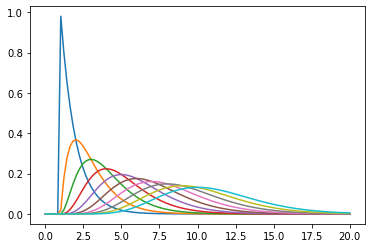

In [2]:
x = np.linspace(0.01, 20, 100)

for i in range(10):
    plt.plot(x, expon(i+1).pdf(x))

Все плотности на одном графике

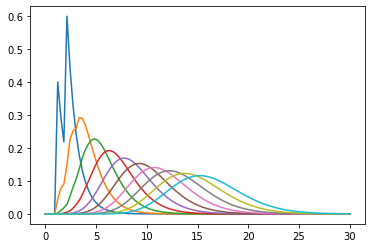

In [3]:
def total_PDF(x, n):
    sum = 0
    k = 0
    while (k <= n):
        sum += (comb(n, k) * expon(n).pdf(x - n + k)) / 2 ** n
        k += 1
    return sum
    
x = np.linspace(0.01, 30, 100);

for i in range(10):
    plt.plot(x, total_PDF(x, i+1))
plt.show()
#x2 = np.linspace(700, 800, 10000)
#plt.plot(x2, total_PDF(x2, 500))
#plt.show()

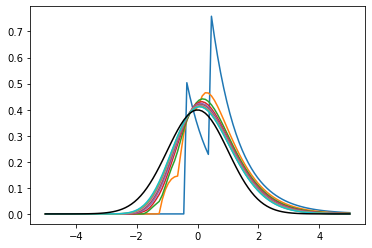

0.3991684007047673
0.9988673639657139


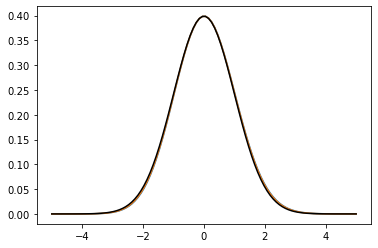

In [4]:
def c_n_total_PDF(x, n):
    return m.sqrt(n * 1.25) * total_PDF(x * m.sqrt(n * 1.25) + 1.5 * n, n)

x = np.linspace(-5, 5, 100);

for i in range(10):
    plt.plot(x, c_n_total_PDF(x, i+1))
plt.plot(x, my_norm(0, 1).pdf(x), color = 'k')
plt.show()

plt.plot(x, c_n_total_PDF(x, 500))
plt.plot(x, c_n_total_PDF(x, 1000))
plt.plot(x, my_norm(0, 1).pdf(x), color = 'k')
print(c_n_total_PDF(0, 500))
a = c_n_total_PDF(0, 500)
print(1/ 2 / m.pi * (a) ** (-2))
plt.show()

In [5]:
integrand = lambda x, n: c_n_total_PDF(x, n) 
print("Integral = ", quad(integrand, -np.inf, np.inf, args = (100,)))

Integral =  (0.9999999999999994, 1.3905416238864603e-08)


${\bf D} sum = n{\bf D} X_1 = n * 1.25; \xi \sim Exp(1), \eta \sim$ смесь

${\bf E} \xi^2 = {\bf D} \xi + {\bf E^2} \xi = 1 + 1 = 2$

${\bf E} (\xi + 1)^2 = {\bf E} \xi^2 + 2{\bf E} \xi + {\bf E} 1 = 2 + 2 + 1 = 5$

${\bf E} \eta^2 = \dfrac{{\bf E} \xi^2 + {\bf E} (\xi + 1)^2}{2} = \dfrac{5 + 2}{2} = 3.5$

${\bf E^2} \eta = (1.5)^2 \Rightarrow {\bf D} \eta = 3.5 - 2.25 = 1.25$ Q.E.D.

Плотности на разных графиках

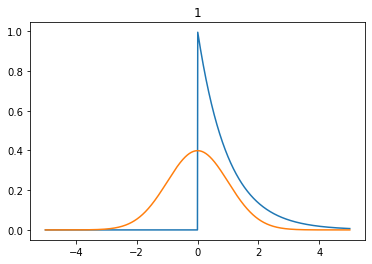

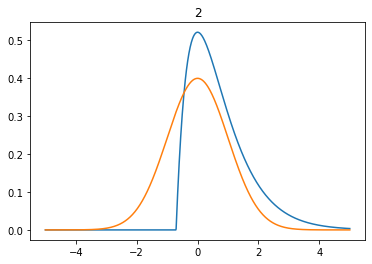

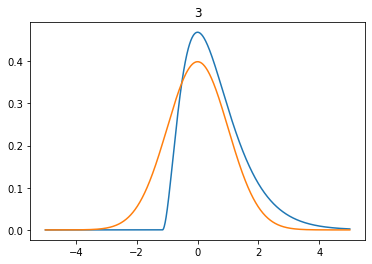

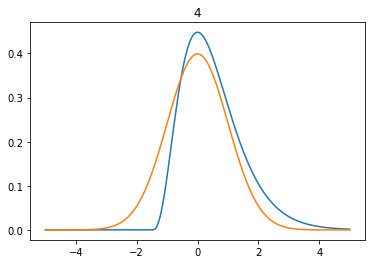

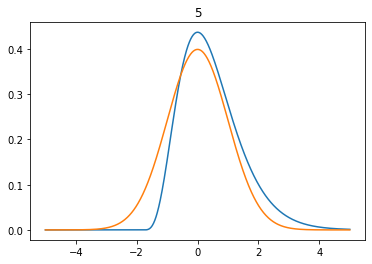

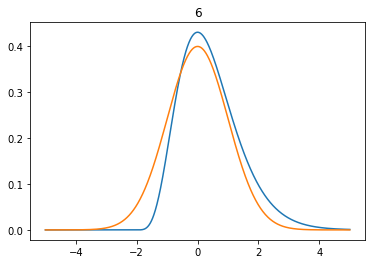

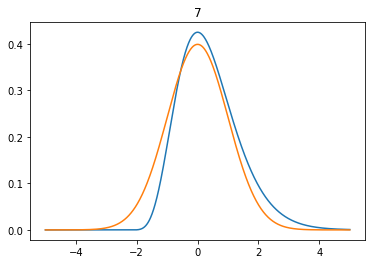

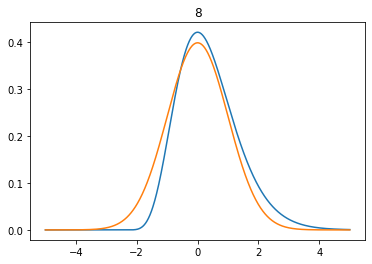

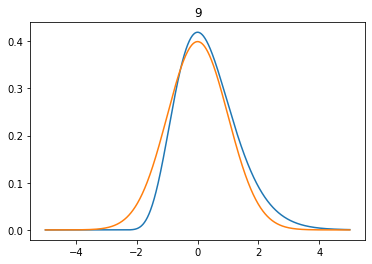

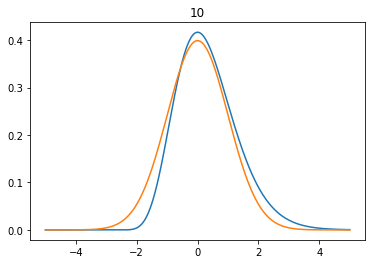

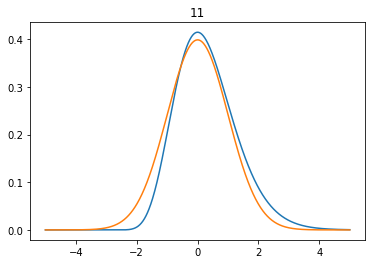

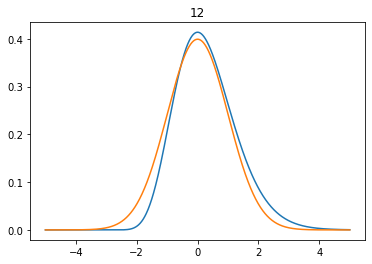

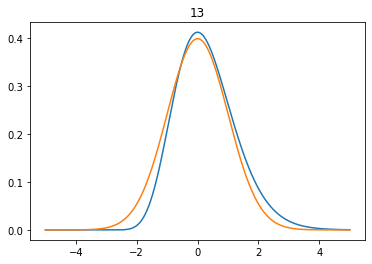

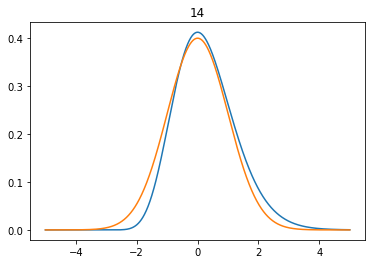

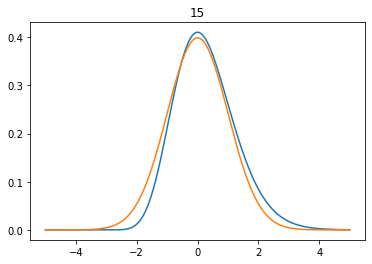

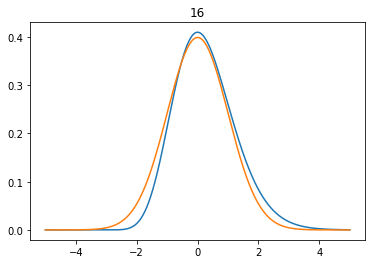

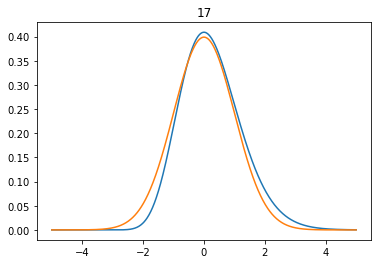

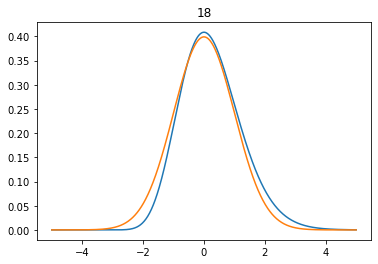

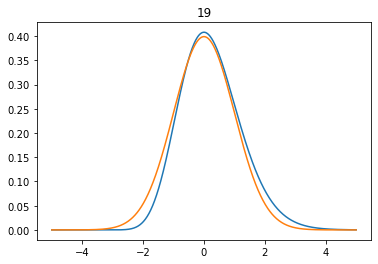

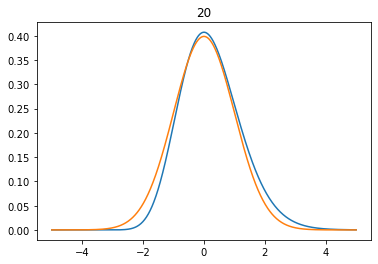

In [6]:
x2 = np.linspace(-5, 5, 1000)

for i in range(20):
    plt.plot(x2, m.sqrt(i + 1) * expon(i+1).pdf(x2 * m.sqrt(i + 1) + i + 1))
    plt.plot(x2, my_norm(0, 1).pdf(x2))
    
    plt.title(i+1)
    plt.show()

Функции распределения

${\bf D} \eta = 1.25$; ${\bf E} \eta = 1.5$; ${\bf E} \eta^2 = 3.5$; ${\bf E} \xi^2 = 2$ - посчитано выше;
${\bf E}\xi^3 = 6$ - посчитано в задаче 1

${\bf E}(\eta - {\bf E}\eta)^3 = {\bf E}\eta^3 - 3{\bf E}\eta {\bf E}\eta^2 + 3 {\bf E}^2\eta {\bf E}\eta - 3{\bf E}^3\eta 
=
{\bf E}\eta^3 - 3 \cdot 1.5 \cdot 3.5 + 3 \cdot 1.5^2 \cdot 1.5 - 1.5^3 = {\bf E}\eta^3 - 9$

${\bf E}\eta^3 = \dfrac{{\bf E} \xi^3 + {\bf E} (\xi + 1)^3}{2} 
=
3 + \dfrac{{\bf E} \xi^3 + 3{\bf E}\xi^2 + 3{\bf E}\xi + 1}{2} = 3 + 8 = 11$

${\bf E}(\eta - {\bf E}\eta)^3 = 11 - 9 = 2$

Я посчитал ${\bf E} (\eta - {\bf E} \eta)^3$, который по модулю меньше, чем
${\bf E} |\eta - {\bf E} \eta|^3$. Даже с таким параметром функция распределения суммы лежит в границах неравенства Берри-Эссеена

In [2]:
def total_CDF(x, n):
    sum = 0
    k = 0
    while (k <= n):
        sum += (comb(n, k) * expon(n).cdf(x - n + k)) / 2 ** n
        k += 1
    return sum

def c_n_total_CDF(x, n):
    return total_CDF(x * m.sqrt(n * 1.25) + 1.5 * n, n)

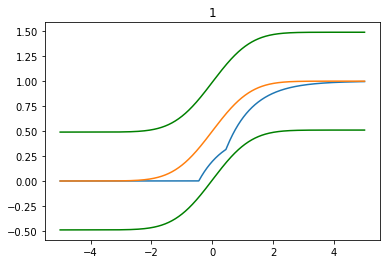

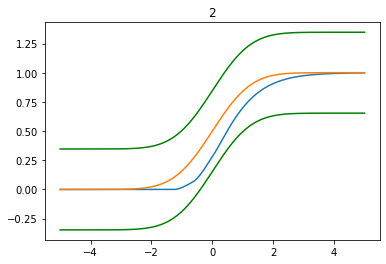

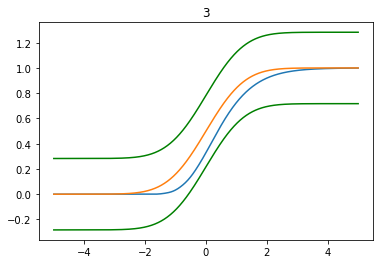

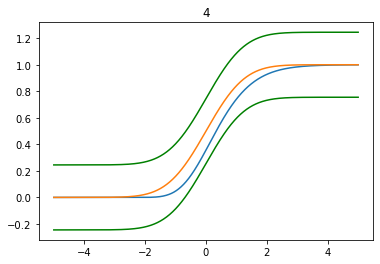

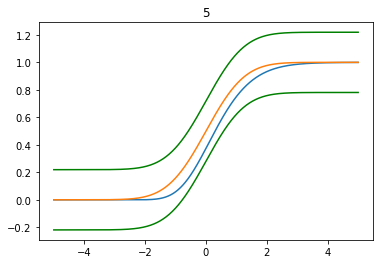

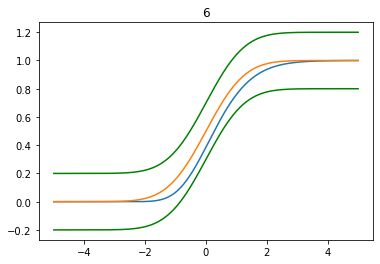

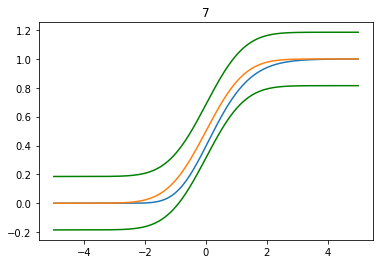

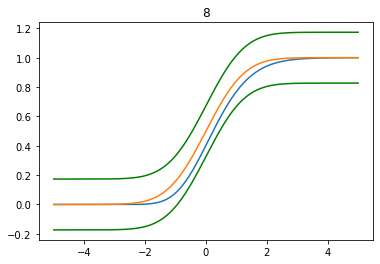

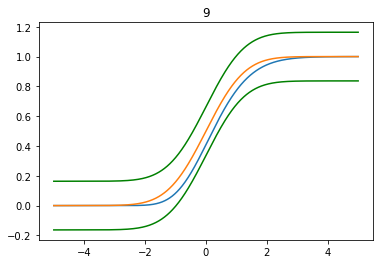

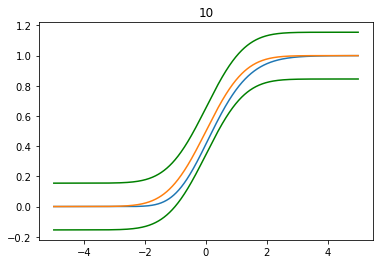

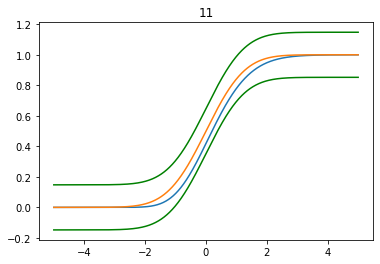

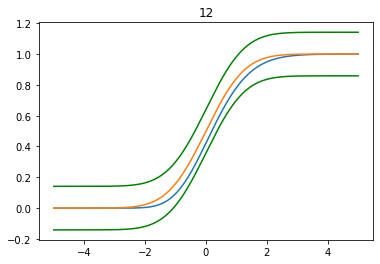

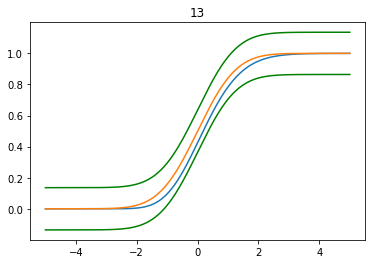

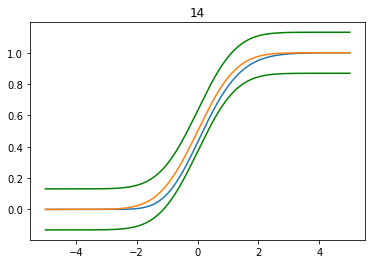

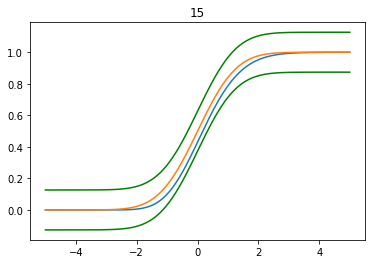

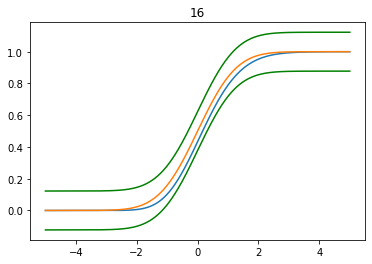

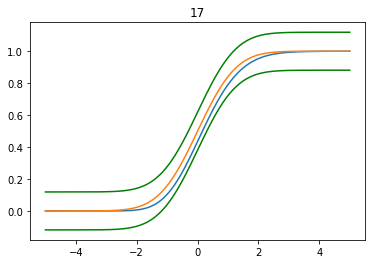

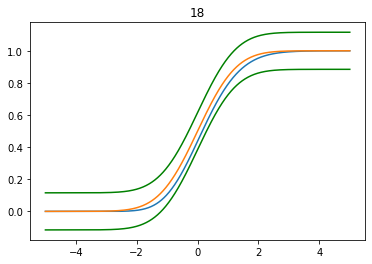

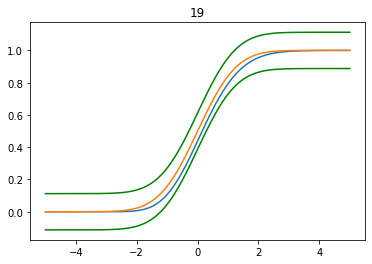

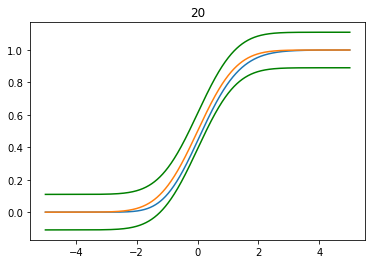

In [3]:
x2 = np.linspace(-5, 5, 1000)
const_B_E = 0.4784

for i in range(20):
    plt.plot(x2, c_n_total_CDF(x2, i+1))
    
    delta_f = const_B_E * 2 / 1.25 ** 3 / m.sqrt(i+1)
    plt.plot(x2, my_norm(0, 1).cdf(x2) + delta_f, color = 'green')
    plt.plot(x2, my_norm(0, 1).cdf(x2))
    plt.plot(x2, my_norm(0, 1).cdf(x2) - delta_f, color = 'green')
    
    plt.title(i+1)
    plt.show()